<a href="https://colab.research.google.com/github/pvtarun/cv-index/blob/main/EX_5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your MP4 video named 'ironman.mp4':


Saving ironman.html to ironman.html
Successfully uploaded: ironman.mp4
📌 **Download and play your video manually:** [Download ironman.mp4](./ironman.mp4)
Extracting 591 frames...
✅ Frames extracted and saved in 'frames'


IntSlider(value=0, description='Select Frame', max=590)

Button(description='Detect Objects in Selected Frame', style=ButtonStyle())


0: 384x640 (no detections), 150.9ms
Speed: 2.6ms preprocess, 150.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


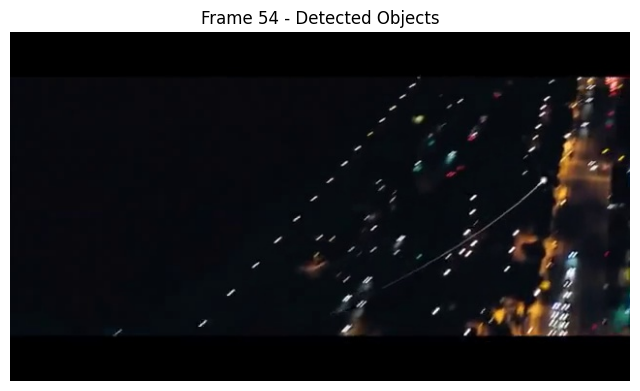


0: 384x640 1 person, 151.6ms
Speed: 3.0ms preprocess, 151.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


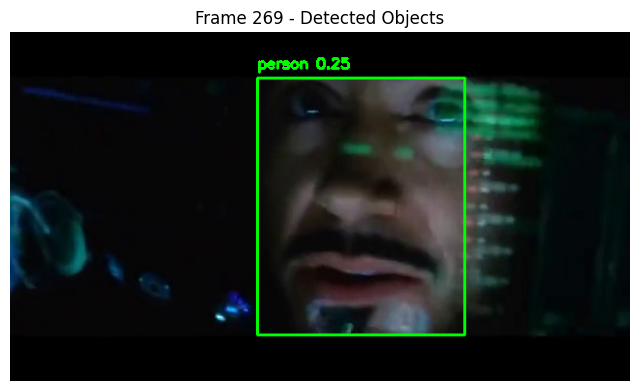

In [ ]:
import cv2
import torch
import os
import ipywidgets as widgets
from google.colab import files
from IPython.display import display, HTML, Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Step 1: Upload the video (Ensure file is named 'ironman.mp4')
print("Upload your MP4 video named 'ironman.mp4':")
uploaded = files.upload()  # User uploads the video
video_path = "ironman.mp4"  # Fixed filename

# Check if file exists
if not os.path.exists(video_path):
    print(f"Error: File '{video_path}' not found!")
    exit()
else:
    print(f"Successfully uploaded: {video_path}")

# Step 2: Display video as a downloadable link (since Colab doesn't support direct playback)
print(f"📌 **Download and play your video manually:** [Download ironman.mp4](./{video_path})")

# Step 3: Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Using YOLOv8 nano for object detection

# Step 4: Extract frames and store them
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video file!")
    exit()

# Get video properties
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_dir = "frames"

# Create directory to store frames
if not os.path.exists(frame_dir):
    os.makedirs(frame_dir)

print(f"Extracting {total_frames} frames...")

# Extract frames
frame_paths = []
for i in range(total_frames):
    ret, frame = cap.read()
    if not ret:
        break
    frame_filename = os.path.join(frame_dir, f"frame_{i}.jpg")
    cv2.imwrite(frame_filename, frame)
    frame_paths.append(frame_filename)

cap.release()
print(f"✅ Frames extracted and saved in '{frame_dir}'")

# Step 5: Function to detect objects in a frame
def detect_objects(frame_path, frame_number):
    frame = cv2.imread(frame_path)
    results = model(frame)

    # Draw detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = result.names[int(box.cls[0])]
            conf = float(box.conf[0])

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save & Display the frame with detections
    output_path = os.path.join(frame_dir, f"detected_{frame_number}.jpg")
    cv2.imwrite(output_path, frame)

    # Show the frame
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {frame_number} - Detected Objects")
    plt.axis("off")
    plt.show()

    return output_path

# Step 6: Interactive Frame Selection and Object Detection
frame_slider = widgets.IntSlider(min=0, max=len(frame_paths)-1, step=1, value=0, description="Select Frame")
button = widgets.Button(description="Detect Objects in Selected Frame")

def on_button_click(b):
    selected_frame_path = frame_paths[frame_slider.value]
    detect_objects(selected_frame_path, frame_slider.value)

button.on_click(on_button_click)

# Display interactive widgets
display(frame_slider, button)
